<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off</font></h1>
<h2 align="center"><font size="5">Deadline: 2020-06-11 07:00:00 (Thursday)</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Your information:
- Fullname: Đinh Việt Hà
- Date of birth: December 12th 1995 
- Place of birth: Ho Chi Minh City
- Email: dinhvietha5000@gmail.com
- Mobile phone: (+84)0775632566

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Logistic Regression Algorithm** to predict: "Whether a loan is paid off on in collection" by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Data exploration

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 

### Tips: Step by step like Chapter2_Ex1_Housing prices 

### Load Data From CSV File  

In [2]:
# Read CSV file: loan_train.csv
train_data = pd.read_csv("./loan_train.csv")

In [3]:
# Understanding to dataset
# shape
# info
# head(), tail()
# describe()

In [4]:
train_data.shape

(346, 10)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [6]:
train_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [7]:
train_data.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [8]:
train_data = train_data.drop(columns="Unnamed: 0", axis=1)
train_data.head()

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [9]:
train_data.describe()

,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000
mean,202.167630,943.641618,22.653179,30.939306
std,115.459715,109.425530,7.991006,6.039418
min,0.000000,300.000000,7.000000,18.000000
25%,107.250000,900.000000,15.000000,27.000000
50%,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,1000.000000,30.000000,35.000000
max,399.000000,1000.000000,30.000000,51.000000


In [10]:
# Identify Variables
# Univariate Analysis
# Bi-variate Analysis
# Handle the Missing Values
# Handle Outlier Values

In [11]:
train_data.Principal.value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

In [12]:
train_data.terms.value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

In [13]:
train_data.education.value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [14]:
train_data.Gender.value_counts()

male      294
female     52
Name: Gender, dtype: int64

Because there exists small groups in variables Principal and terms compared to the total 346 values, these two variables are considered as Categorical variables.

#### Identify Variables

|Type of variable|Data Type|Variable Category|
|----------------|---------|-----------------|
|Predictor variable|Character|Categorical|
|<ul><li>Principal</li><li>terms</li><li>age</li><li>Gender</li><li>effective_date</li></ul>|<ul><li>loan_status</li><li>effective_date</li><li>education</li><li>Gender</li></ul>|<ul><li>loan_status</li><li>effective_date</li><li>education</li><li>Gender</li><li>Principal</li><li>terms</li></ul>|
|Target Variable|Numeric|Continuous|
|<ul><li>loan_status</li></ul>|<ul><li>Principal</li><li>terms</li><li>age</li></ul>|<ul><li>age</li></ul>

#### Univariate Analysis

##### Continuous Variables

        Central of Tendency

In [15]:
from scipy import stats

In [16]:
def central_tendency(data,var_names):
    for var in var_names:
        print("\nCentral tendency of " + var + ":")
        print("- Mean: ", round(np.mean(data[var][data[var].notnull()]) ,3))
        print("- Median: ", np.median(data[var][data[var].notnull()]))
        print("- Mode: ", stats.mode(data[var][data[var].notnull()])[0])
        print("- Min: ", np.min(data[var][data[var].notnull()]))
        print("- Max: ", np.max(data[var][data[var].notnull()]))

In [17]:
var_names = ["age"]
central_tendency(train_data,var_names)


Central tendency of age:
- Mean:  30.939
- Median:  30.0
- Mode:  [26]
- Min:  18
- Max:  51


        Distribution

In [18]:
import seaborn as sns

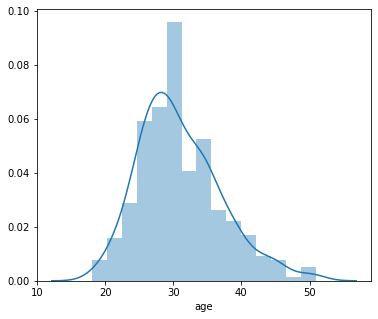

In [19]:
plt.figure(figsize=(6,5))
sns.distplot(train_data["age"][train_data["age"].notnull()])

plt.show()

The graph above shows that variable age has adistribution close to normal distribution. While the distribution tends to be right-skewed, the distribution still shows a light bell-shape curve.

The graph shows that most people who came for a loan are around 30 years old. Ages from 25 to 35 also accounts for most of people coming for a loan. Smaller number of middle-age than younger people in their 20s applied for a loan. 

##### Categorical Variables

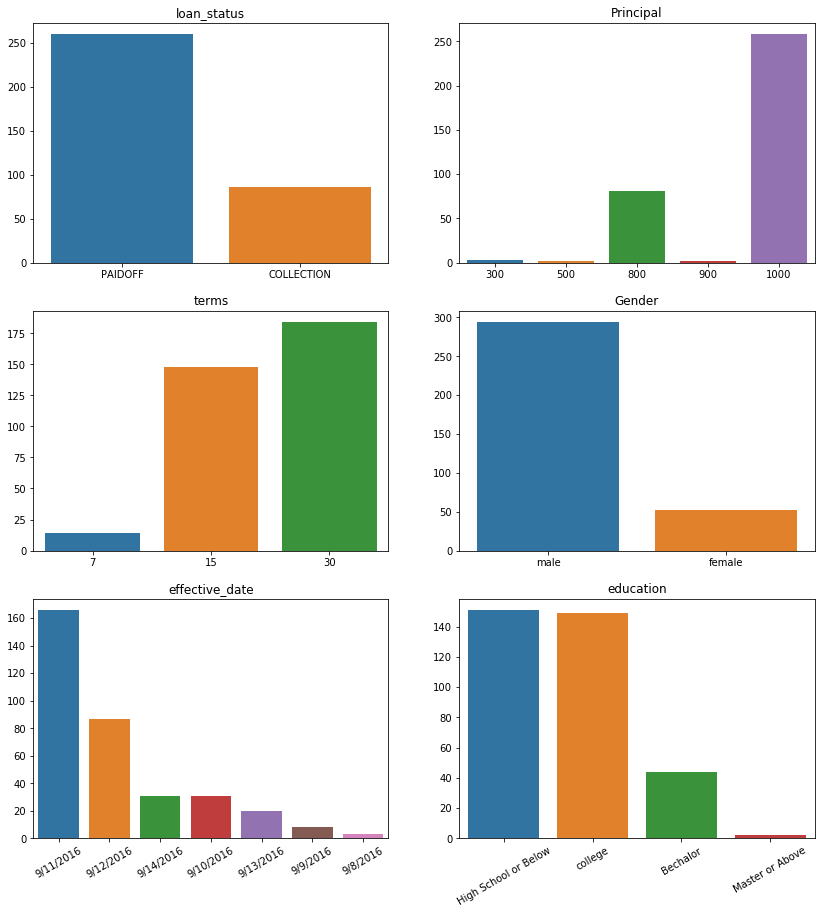

In [20]:
plt.figure(figsize=(14,15))

plt.subplot(3,2,1)
sns.barplot(x=train_data["loan_status"].value_counts().index, y=train_data["loan_status"].value_counts().values)
plt.title("loan_status")

plt.subplot(3,2,2)
sns.barplot(x=train_data["Principal"].value_counts().index, y=train_data["Principal"].value_counts().values)
plt.title("Principal")

plt.subplot(3,2,3)
sns.barplot(x=train_data["terms"].value_counts().index, y=train_data["terms"].value_counts().values)
plt.title("terms")

plt.subplot(3,2,4)
sns.barplot(x=train_data["Gender"].value_counts().index, y=train_data["Gender"].value_counts().values)
plt.title("Gender")

plt.subplot(3,2,5)
sns.barplot(x=train_data["effective_date"].value_counts().index, y=train_data["effective_date"].value_counts().values)
plt.xticks(rotation=30)
plt.title("effective_date")

plt.subplot(3,2,6)
sns.barplot(x=train_data["education"].value_counts().index, y=train_data["education"].value_counts().values)
plt.xticks(rotation=30)
plt.title("education")

plt.show()

Graph 1. Most loans have been paid off, about 3 times more than the loans that were in collection. 

Graph 2. Most loan principals are 800 and 1000, with 1000 has more than 3 times that of 800. Other principals are minor with few take-outs.

Graph 3. Most loans have terms of 30, while few loans have terms of 15, different by 20. Only around 12 loans with terms of 7.

Graph 4. Male is the gender has the most loans, outnumbered the loans from female by almost 6 times.

Graph 5. Most loans were effective from September 11th 2016, fewer were from September 12th, while other earlier or latter days have minor loans subscription.

Graph 6. Most people applied for loans are in college, high school or below.

#### Bivariate analysis

##### Continuous variables

Since there is only one continuous variable (age), we cannot identify any relationship between continuous variables.

##### Categorical variables

In [21]:
L_P_table = pd.crosstab(train_data.loan_status, train_data.Principal)
L_P_table

Principal,300,500,800,900,1000
loan_status,,,,,
COLLECTION,0,0,18,0,68
PAIDOFF,3,2,63,2,190


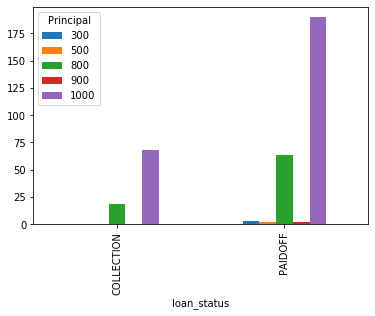

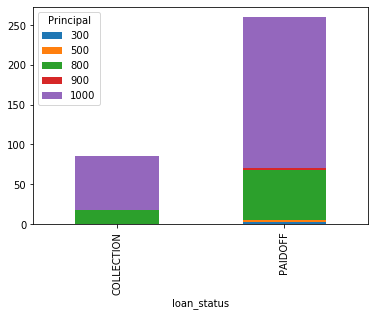

In [22]:
L_P_table.plot.bar()
L_P_table.plot.bar(stacked=True)

All the minor loan amount (300,500,900) are paid off. Since the loan amount of 1000 have the most subscriptions, it also accounts for the majority of collection and paid off status.

In [23]:
L_T_table = pd.crosstab(train_data.loan_status, train_data.terms)
L_T_table

terms,7,15,30
loan_status,,,
COLLECTION,0,34,52
PAIDOFF,14,114,132


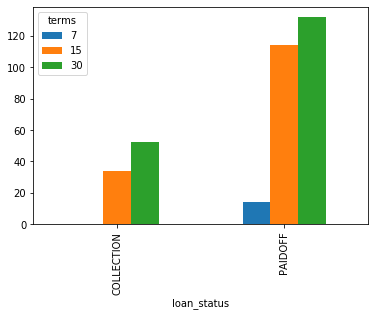

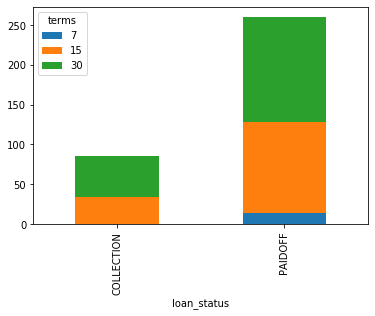

In [24]:
L_T_table.plot.bar()
L_T_table.plot.bar(stacked=True)

All loans with terms of 7 are paid off, while the unpaid and paid loans of terms 15 ans 30 almost similar in percentages, with loans with terms 30 accounts for higher percentage. 

In [25]:
L_G_table = pd.crosstab(train_data.loan_status, train_data.Gender)
L_G_table

Gender,female,male
loan_status,,
COLLECTION,7,79
PAIDOFF,45,215


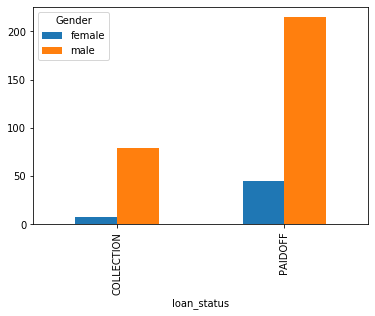

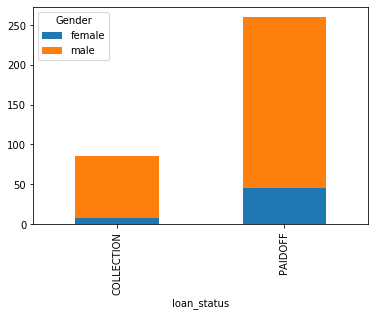

In [26]:
L_G_table.plot.bar()
L_G_table.plot.bar(stacked=True)

The percentage of female and male in collection and paid off are similar, with male subscriber outnumbered female subscriber. This can be explained because the numbers of male subscibers are much higher in female subscribers, so more male subscribers paid off their loans than female. 

In [27]:
L_E_table = pd.crosstab(train_data.loan_status, train_data.effective_date)
L_E_table

effective_date,9/10/2016,9/11/2016,9/12/2016,9/13/2016,9/14/2016,9/8/2016,9/9/2016
loan_status,,,,,,,
COLLECTION,14,65,3,0,0,0,4
PAIDOFF,17,101,84,20,31,3,4


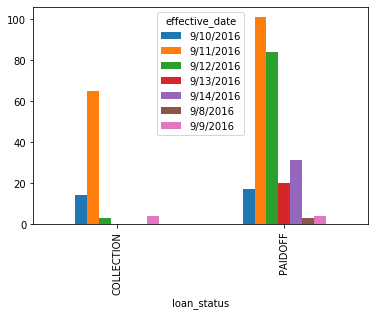

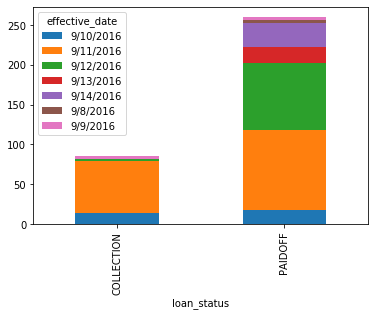

In [28]:
L_E_table.plot.bar()
L_E_table.plot.bar(stacked=True)

Loans effective on September 13,14 and 8 are all paid off. The number of loans that are effective from September 10,9 are almost equal between collection and paid off. Loans that are effective from September 12 are mostly paid off, only a tiny amount of them still remains in collection. The majority of loans are effective from September 11, in which the ratio between collection and paidoff is not large.  

In [29]:
P_T_table = pd.crosstab(train_data.Principal,train_data.terms)
P_T_table

terms,7,15,30
Principal,,,
300,3,0,0
500,1,1,0
800,1,75,5
900,1,1,0
1000,8,71,179


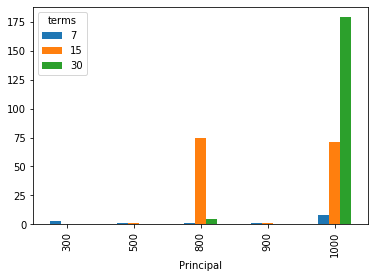

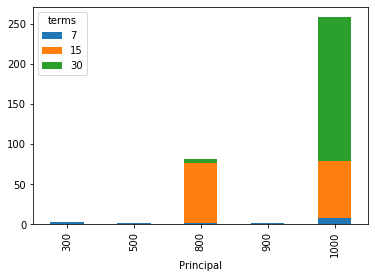

In [30]:
P_T_table.plot.bar()
P_T_table.plot.bar(stacked=True)

The loans with principal of 1000 mostly have terms of 30, while there exists an almost equal number of 1000 loans and 800 loans with terms 15.

In [31]:
P_G_table = pd.crosstab(train_data.Principal, train_data.Gender)
P_G_table

Gender,female,male
Principal,,
300,0,3
500,1,1
800,12,69
900,1,1
1000,38,220


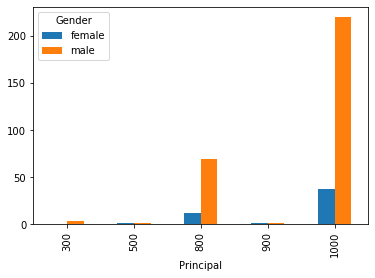

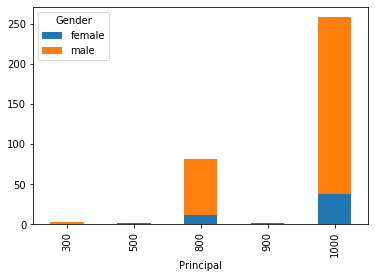

In [32]:
P_G_table.plot.bar()
P_G_table.plot.bar(stacked=True)

Male dominates in both principal of 800 and 1000, in which the ratio between 800 and 1000 are similar between female and male. 

In [33]:
G_T_table = pd.crosstab(train_data.Gender, train_data.terms)
G_T_table

terms,7,15,30
Gender,,,
female,3,23,26
male,11,125,158


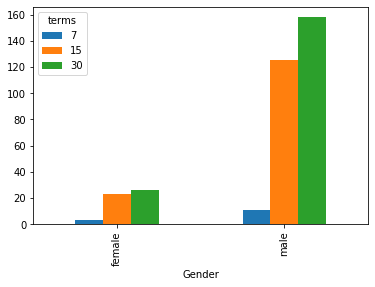

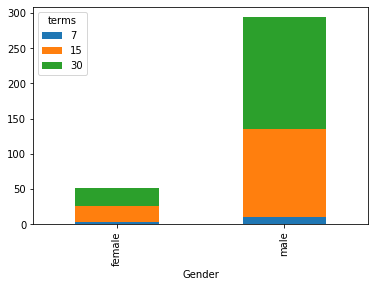

In [34]:
G_T_table.plot.bar()
G_T_table.plot.bar(stacked=True)

The graphs above show there is no significant differences between female and male in the ratio of terms chosen. 

#### Chi-squared test

H0: 2 variables are independent.

H1: 2 variables are related to each other.

In [35]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

**loan_status & Principal**

In [36]:
L_P_table

Principal,300,500,800,900,1000
loan_status,,,,,
COLLECTION,0,0,18,0,68
PAIDOFF,3,2,63,2,190


In [37]:
def chi2_test(table):
    stat, p, dof, expected = chi2_contingency(table)
    print("dof=%d" % dof)
    print(expected)
    
    prob = 0.95
    critical = chi2.ppf(prob,dof)
    print("probability=%.3f, critical=%.3f, stat=%.3f" %(prob, critical, stat))
    
    alpha = 1.0 - prob
    print("significance=%.3f, p=%.3f" %(alpha,p))
    if p <= alpha:
        print("Dependent(reject H0)")
    else:
        print("Independent (fail to reject H0)")
        
    if abs(stat) >= critical:
        print("Dependent(reject H0)")
    else:
        print("Independent (fail to reject H0)")

In [38]:
chi2_test(L_P_table)

dof=4
[[  0.74566474   0.49710983  20.13294798   0.49710983  64.12716763]
 [  2.25433526   1.50289017  60.86705202   1.50289017 193.87283237]]
probability=0.950, critical=9.488, stat=2.927
significance=0.050, p=0.570
Independent (fail to reject H0)
Independent (fail to reject H0)


**loan_status & terms**

In [39]:
L_T_table

terms,7,15,30
loan_status,,,
COLLECTION,0,34,52
PAIDOFF,14,114,132


In [40]:
chi2_test(L_T_table)

dof=2
[[  3.47976879  36.78612717  45.73410405]
 [ 10.52023121 111.21387283 138.26589595]]
probability=0.950, critical=5.991, stat=6.054
significance=0.050, p=0.048
Dependent(reject H0)
Dependent(reject H0)


**loan_status & Gender**

In [41]:
L_G_table

Gender,female,male
loan_status,,
COLLECTION,7,79
PAIDOFF,45,215


In [42]:
chi2_test(L_G_table)

dof=1
[[ 12.92485549  73.07514451]
 [ 39.07514451 220.92485549]]
probability=0.950, critical=3.841, stat=3.566
significance=0.050, p=0.059
Independent (fail to reject H0)
Independent (fail to reject H0)


**loan_status & effective_date**

In [43]:
L_E_table

effective_date,9/10/2016,9/11/2016,9/12/2016,9/13/2016,9/14/2016,9/8/2016,9/9/2016
loan_status,,,,,,,
COLLECTION,14,65,3,0,0,0,4
PAIDOFF,17,101,84,20,31,3,4


In [44]:
chi2_test(L_E_table)

dof=6
[[  7.70520231  41.26011561  21.62427746   4.97109827   7.70520231
    0.74566474   1.98843931]
 [ 23.29479769 124.73988439  65.37572254  15.02890173  23.29479769
    2.25433526   6.01156069]]
probability=0.950, critical=12.592, stat=66.937
significance=0.050, p=0.000
Dependent(reject H0)
Dependent(reject H0)


Chi-squared test gives the result that loan_status and terms, loan_status and effective_date are related to each other.

#### Categorical and Continuous Variables

**Age, Gender to Principal**

In [45]:
d_melt = train_data[["Principal","age","Gender"]]
d_melt.head()

,Principal,age,Gender
0,1000,45,male
1,1000,33,female
2,1000,27,male
3,1000,28,female
4,1000,29,male


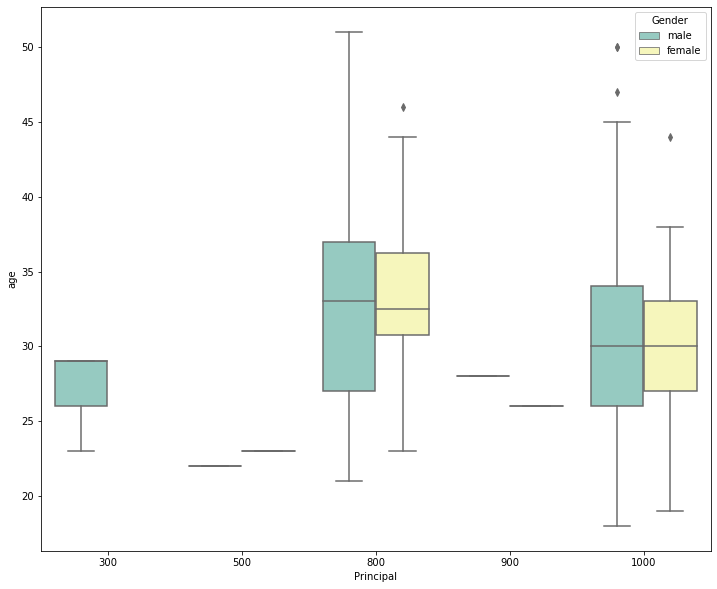

In [46]:
plt.figure(figsize=(12,10))
sns.boxplot(x="Principal", y="age", hue="Gender", data=d_melt, palette="Set3")
plt.show()

The boxplot above shows that young people (under 30) tend to have loan of lower principal 300 and 500.  

People who subscribed to loan of principal 800 and 1000 have age range higher than that of others. Specifically, most male subscribers of 800 principal have age from 26 to 37, same gender on the 1000 subscribers side have age from 26 to 35. Among female subscribers, a higher range of age for 800 principal (31-37) and a lower range of age for 1000 principal (27-32).

We can suspect that younger people, mid-20s to mid-30s under 35 are bolder risk-takers.

**ANOVA**

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [48]:
model = ols("Principal ~ C(age) + C(Gender) + C(age):C(Gender)", data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 31, but rank is 20
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(age),1.760340e+07,31.0,48.334456,1.270998e-80
C(Gender),2.707712e+03,1.0,0.230475,6.315286e-01
C(age):C(Gender),3.375112e+05,31.0,0.926720,5.828125e-01
Residual,3.454024e+06,294.0,NaN,NaN


Probability result from the table above has statistical meaning, in which for probability of C(age) < 0.05, it shows that age strongly affects Principal, while other Gender or combination of Gender and Age do not have strong effect on the choice of Principal.

**Age, Principal to terms**

In [49]:
d_melt_2 = train_data[["age","Principal","terms"]]
d_melt_2.head()

,age,Principal,terms
0,45,1000,30
1,33,1000,30
2,27,1000,15
3,28,1000,30
4,29,1000,30


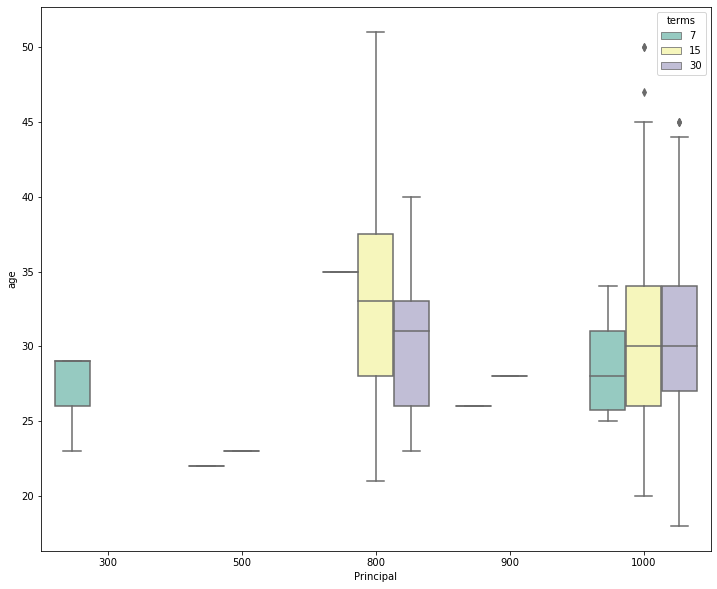

In [50]:
plt.figure(figsize=(12,10))
sns.boxplot(x="Principal", y="age", hue="terms", data=d_melt_2, palette="Set3")
plt.show()

The graph above shows that younger people tend to choose longer term (30) for loan of 800, while for the case of 1000 principal, age range is not considerably different between 15 or 30 of terms.

Only few people choose the shortest terms, that happen to the case of 1000 and 300 of principal.

**ANOVA**

In [51]:
model2 = ols("terms ~ C(age) + C(Principal) + C(age):C(Principal)", data=d_melt_2).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 31, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 124, but rank is 59
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(age),-2.067653e+01,31.0,-1.460418e-02,1.000000
C(Principal),1.336488e-08,4.0,7.315874e-11,1.000000
C(age):C(Principal),5.794630e+03,124.0,1.023211e+00,0.437321
Residual,1.297051e+04,284.0,NaN,NaN


The table above gives the result that variables age, Principal and their combination do not strongly affect the terms choice. 

**Age, Principal to loan_status**

In [52]:
d_melt_3 = train_data[["age","Principal","effective_date"]]
d_melt_3.head()

,age,Principal,effective_date
0,45,1000,9/8/2016
1,33,1000,9/8/2016
2,27,1000,9/8/2016
3,28,1000,9/9/2016
4,29,1000,9/9/2016


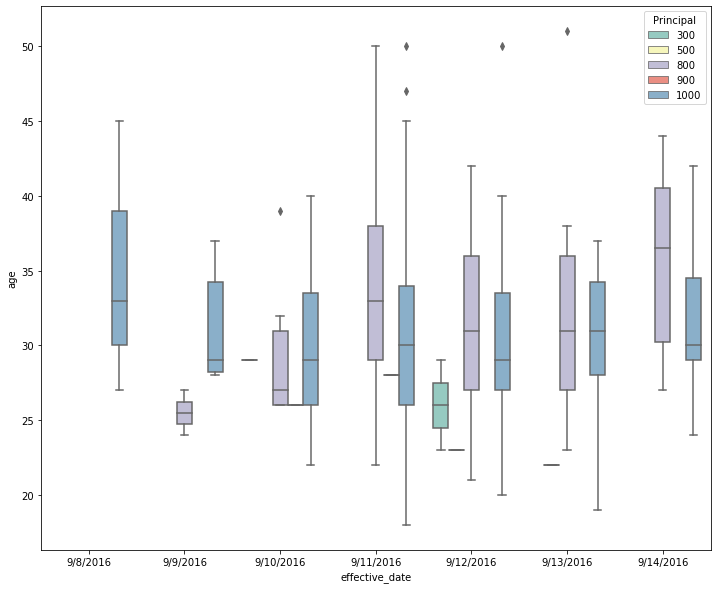

In [53]:
plt.figure(figsize=(12,10))
sns.boxplot(x="effective_date", y="age", hue="Principal", data=d_melt_3, palette="Set3")
plt.show()

People who took out loans of 800 mostly subscribed in later days, while people took out loans of 1000 distributed among the days. People who subscribed on the earliest day (September 8) have higher age range (above 30) and took out loans of 1000. People who took out loans of 800 has higher age range than people who took out loans of 1000.

This suggests that older people tend to be more careful in loans.

In [54]:
model3 = ols("Principal ~ C(age) + C(effective_date) + C(age):C(effective_date)", data=d_melt_3).fit()
anova_table3 = sm.stats.anova_lm(model3, typ=2)
anova_table3

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 31, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1848: RuntimeWarning: invalid value encountered in true_divide
  F /= J
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: 

,sum_sq,df,F,PR(>F)
C(age),1.324173e+08,31.0,412.188490,8.864979e-95
C(effective_date),NaN,6.0,NaN,NaN
C(age):C(effective_date),3.041707e+06,186.0,1.578037,3.372476e-03
Residual,2.507856e+06,242.0,NaN,NaN


The table above gives the result that age and the combination of age and effective_date considerably affect the choice of principal.

### Convert 'due_date', 'effective_date' to date time object 

In [55]:
train_data["effective_date"] = pd.to_datetime(train_data["effective_date"])
train_data["due_date"] = pd.to_datetime(train_data["due_date"])
train_data.head()

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [56]:
train_data["effective_date"].dtype

dtype('<M8[ns]')

# Data visualization

How many sample of each class is in our data set?

In [57]:
count = train_data["loan_status"].value_counts()
count

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

**260** people have paid off the loan on time while **86** have gone into collection 

Lets plot some columns to underestand data better:
- Use seaborn or matplotlib to draw some plots like that:

In [58]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [59]:
img1 = np.array(Image.open('Principal_Male_Female.jpg'))

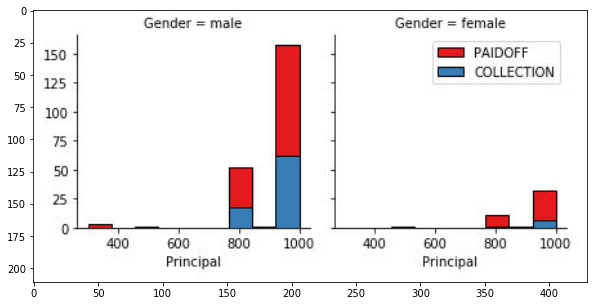

In [60]:
plt.figure(figsize=(10,5))
plt.imshow(img1, interpolation='bilinear')
plt.show()

In [61]:
img2 = np.array(Image.open('Age_Male_Female.jpg'))

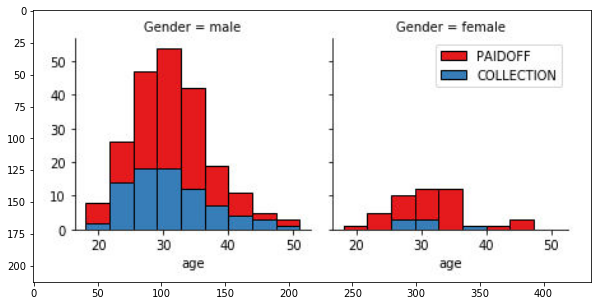

In [62]:
plt.figure(figsize=(10,5))
plt.imshow(img2, interpolation='bilinear')
plt.show()

In [63]:
male_train = train_data[train_data["Gender"] == "male"]
female_train = train_data[train_data["Gender"] == "female"]

In [64]:
male_table = pd.crosstab(male_train.Principal,male_train.loan_status)
male_table

loan_status,COLLECTION,PAIDOFF
Principal,,
300,0,3
500,0,1
800,17,52
900,0,1
1000,62,158


In [65]:
female_table = pd.crosstab(female_train.Principal,female_train.loan_status)
female_table

loan_status,COLLECTION,PAIDOFF
Principal,,
500,0,1
800,1,11
900,0,1
1000,6,32


In [66]:
female_train.Principal.dtype

dtype('int64')

<function matplotlib.pyplot.show(*args, **kw)>

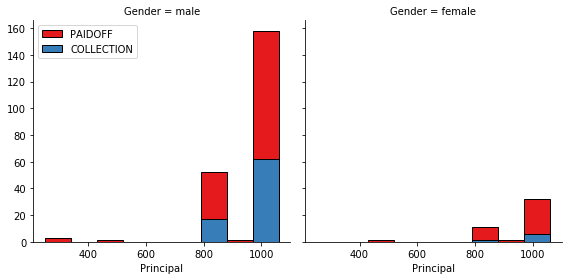

In [67]:
g = sns.FacetGrid(data=train_data,col="Gender",hue="loan_status",palette="Set1", height=4,legend_out=False)
g.map(plt.hist, "Principal",bins = np.arange(250,1100,90),stacked=True, edgecolor="black")
g.add_legend(title="")
plt.show

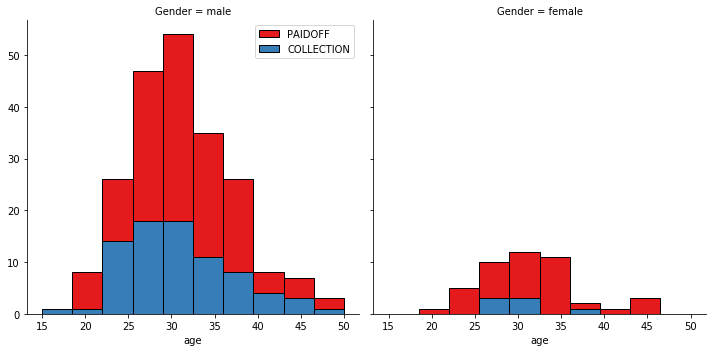

In [68]:
g = sns.FacetGrid(data=train_data,col="Gender",hue="loan_status",palette="Set1", height=5, legend_out=False)
g.map(plt.hist, "age", bins=np.arange(15,51,3.5), stacked=True,edgecolor='black')
g.add_legend(title="")
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

In [69]:
train_data["dayofweek"] = train_data["effective_date"].dt.dayofweek
train_data = train_data.drop(columns="Unnamed: 0.1", axis=1)
train_data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


Lets plot some columns to underestand data better:

In [70]:
img3 = np.array(Image.open('day_of_week.jpg'))

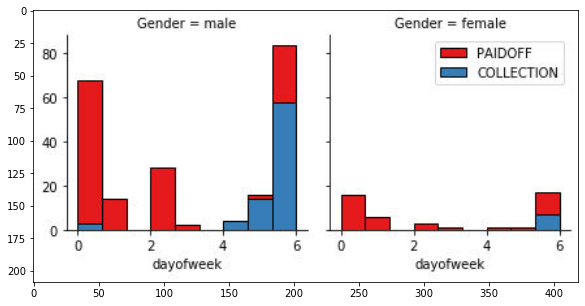

In [71]:
plt.figure(figsize=(10,5))
plt.imshow(img3, interpolation='bilinear')
plt.show()

In [72]:
male_train2 = train_data[train_data["Gender"] == "male"]
female_train2 = train_data[train_data["Gender"] == "female"]

In [73]:
male_table_day = pd.crosstab(male_train2["dayofweek"], male_train2["loan_status"])
female_table_day = pd.crosstab(female_train2["dayofweek"], female_train2["loan_status"])

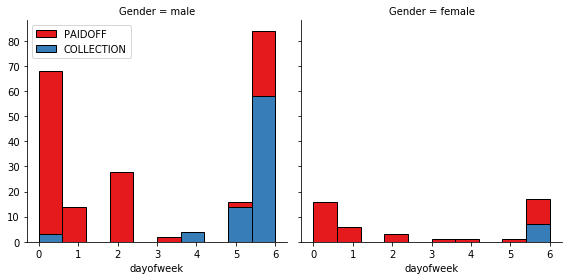

In [74]:
g = sns.FacetGrid(data=train_data,col="Gender",hue="loan_status",palette="Set1",height=4,
                  hue_order=["PAIDOFF","COLLECTION"], legend_out=False)
g = (g.map(plt.hist, "dayofweek", bins=np.arange(0,6.5,0.6), stacked=True,edgecolor='black').add_legend(title=""))
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4 
- Make new column 'weekend': =1 if 'dayofweek'>3, else =0

In [75]:
def recode_day(day):
    if day > 3:
        return 1
    else:
        return 0

In [76]:
train_data["weekend"] = train_data["dayofweek"].apply(recode_day)
train_data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [77]:
G_L_count = train_data.groupby(by="Gender")["loan_status"].value_counts()
G_L_count

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

In [78]:
female_paid = 45/52 *100
female_paid

86.53846153846155

In [79]:
male_paid = 215/(215+79) *100
male_paid

73.12925170068027

**86.5** % of female pay there loans while only **73.1** % of males pay there loan

Lets convert male to 0 and female to 1:


In [80]:
def recode_gender(gender):
    if gender == "male":
        return 0
    else:
        return 1

In [81]:
train_data["Gender"] = train_data["Gender"].apply(recode_gender)
train_data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [82]:
train_data["education"] = train_data["education"].str.replace("Bechalor","Bachelor")

In [83]:
E_L_count = train_data.groupby(by="education")["loan_status"].value_counts()
E_L_count

education             loan_status
Bachelor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64

#### Feature befor One Hot Encoding
- Print head() data with 5 columns: 'Principal','terms','age','Gender','education'

In [84]:
train_data[["Principal","terms","age","Gender","education"]].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bachelor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'

In [85]:
Feature = train_data[["Principal","terms","age","Gender","weekend","education"]]
Feature

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,0,0,High School or Below
1,1000,30,33,1,0,Bachelor
2,1000,15,27,0,0,college
3,1000,30,28,1,1,college
4,1000,30,29,0,1,college
...,...,...,...,...,...,...
341,800,15,32,0,1,High School or Below
342,1000,30,25,0,1,High School or Below
343,800,15,39,0,0,college
344,1000,30,28,0,0,college


In [86]:
Feature.shape

(346, 6)

In [87]:
Feature_new = pd.get_dummies(Feature, columns=["education"])
Feature_new.head()

,Principal,terms,age,Gender,weekend,education_Bachelor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In [88]:
Feature = Feature_new.drop(columns="education_Master or Above", axis=1)
Feature.head()

,Principal,terms,age,Gender,weekend,education_Bachelor,education_High School or Below,education_college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:
- X is input, X = Feature

In [89]:
X = Feature

What are our lables?
- y is output, y = 'loan_status' column

In [90]:
y = train_data["loan_status"]

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )
- Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

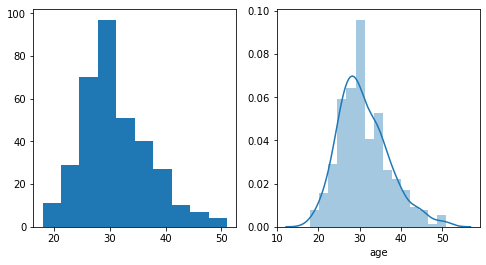

In [91]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(X.age)
plt.subplot(1,2,2)
sns.distplot(X.age)

plt.show()

In [92]:
age_skew = X.age.skew()
age_kur = X.age.kurtosis()
print("Age skewness: ",age_skew)
print("Age kurtosis: ",age_kur)

Age skewness:  0.700410003463071
Age kurtosis:  0.4810630956818449


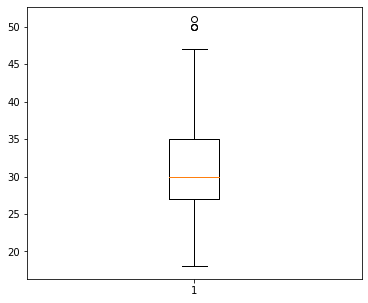

In [93]:
plt.figure(figsize=(6,5))
plt.boxplot(X.age)
plt.show()

In [94]:
age_q1 = np.percentile(X.age, 25)
age_q3 = np.percentile(X.age, 75)
age_iqr = age_q3 - age_q1
outliers = X.age[(X.age < (age_q1 - 3*age_iqr)) | (X.age > (age_q3 + 1.5*age_iqr))]
outliers

41     50
184    50
223    51
293    50
Name: age, dtype: int64

In [95]:
#break

In [96]:
outliers_per = outliers.shape[0] / X.shape[0] *100
outliers_per

1.1560693641618496

Because the percentage of outliers is small, we can get rid of the outliers for scaling.

In [97]:
X = X[(X.age >= (age_q1 - 1.5*age_iqr)) & (X.age <= (age_q3 + 1.5*age_iqr))]
X.shape

(342, 8)

In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 345
Data columns (total 8 columns):
Principal                         342 non-null int64
terms                             342 non-null int64
age                               342 non-null int64
Gender                            342 non-null int64
weekend                           342 non-null int64
education_Bachelor                342 non-null uint8
education_High School or Below    342 non-null uint8
education_college                 342 non-null uint8
dtypes: int64(5), uint8(3)
memory usage: 17.0 KB


In [99]:
X.isnull().any()

Principal                         False
terms                             False
age                               False
Gender                            False
weekend                           False
education_Bachelor                False
education_High School or Below    False
education_college                 False
dtype: bool

In [100]:
X.Principal.unique()

array([1000,  800,  300,  900,  500], dtype=int64)

In [101]:
#break

Now the outliers are removed, we can use MinMaxScaler to scale the age variable.

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
min_max = MinMaxScaler()
age_reshaped = X.age.as_matrix().reshape(-1, 1)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [104]:
X_minmax = min_max.fit_transform(age_reshaped)
df_age = pd.DataFrame(X_minmax, columns=["age_mm"])
df_age.head()

,age_mm
0,0.931034
1,0.517241
2,0.310345
3,0.344828
4,0.379310


In [105]:
print("Before scaling: ")
print(X.age.describe())
print("\n")
print("After scaling: ")
print(df_age.describe())

Before scaling: 
count    342.000000
mean      30.713450
std        5.698669
min       18.000000
25%       27.000000
50%       30.000000
75%       34.000000
max       47.000000
Name: age, dtype: float64


After scaling: 
           age_mm
count  342.000000
mean     0.438395
std      0.196506
min      0.000000
25%      0.310345
50%      0.413793
75%      0.551724
max      1.000000


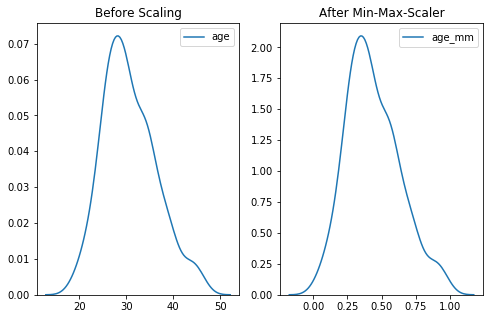

In [106]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X["age"], ax=ax1)

ax2.set_title("After Min-Max-Scaler")
sns.kdeplot(df_age["age_mm"], ax=ax2)

plt.show()

In [107]:
X["age_mm"] = df_age.values

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
X.isnull().any()

Principal                         False
terms                             False
age                               False
Gender                            False
weekend                           False
education_Bachelor                False
education_High School or Below    False
education_college                 False
age_mm                            False
dtype: bool

In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 345
Data columns (total 9 columns):
Principal                         342 non-null int64
terms                             342 non-null int64
age                               342 non-null int64
Gender                            342 non-null int64
weekend                           342 non-null int64
education_Bachelor                342 non-null uint8
education_High School or Below    342 non-null uint8
education_college                 342 non-null uint8
age_mm                            342 non-null float64
dtypes: float64(1), int64(5), uint8(3)
memory usage: 19.7 KB


In [110]:
X = X.drop(columns="age",axis=1)

In [111]:
X

,Principal,terms,Gender,weekend,education_Bachelor,education_High School or Below,education_college,age_mm
0,1000,30,0,0,0,1,0,0.931034
1,1000,30,1,0,1,0,0,0.517241
2,1000,15,0,0,0,0,1,0.310345
3,1000,30,1,1,0,0,1,0.344828
4,1000,30,0,1,0,0,1,0.379310
...,...,...,...,...,...,...,...,...
341,800,15,0,1,0,1,0,0.482759
342,1000,30,0,1,0,1,0,0.241379
343,800,15,0,0,0,0,1,0.724138
344,1000,30,0,0,0,0,1,0.344828


In [112]:
X.Principal.unique()

array([1000,  800,  300,  900,  500], dtype=int64)

Encode categorical variables Principal and terms

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
label_encoder = preprocessing.LabelEncoder()
X.Principal = label_encoder.fit_transform(X.Principal)
X.Principal.unique()

array([4, 2, 0, 3, 1], dtype=int64)

In [115]:
X.head()

,Principal,terms,Gender,weekend,education_Bachelor,education_High School or Below,education_college,age_mm
0,4,30,0,0,0,1,0,0.931034
1,4,30,1,0,1,0,0,0.517241
2,4,15,0,0,0,0,1,0.310345
3,4,30,1,1,0,0,1,0.344828
4,4,30,0,1,0,0,1,0.379310


In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 345
Data columns (total 8 columns):
Principal                         342 non-null int64
terms                             342 non-null int64
Gender                            342 non-null int64
weekend                           342 non-null int64
education_Bachelor                342 non-null uint8
education_High School or Below    342 non-null uint8
education_college                 342 non-null uint8
age_mm                            342 non-null float64
dtypes: float64(1), int64(4), uint8(3)
memory usage: 17.0 KB


In [117]:
X.terms = label_encoder.fit_transform(X.terms)
X.terms.unique()

array([2, 1, 0], dtype=int64)

To predict whether a loan is paid off, education does not play an important row. We only need Principal', 'Terms', 'Age', 'Gender', 'Effective_date' to do the prediction. Therefore, education columns will be removed.

In [118]:
X = X.drop(columns=["education_Bachelor","education_High School or Below","education_college"], axis=1)
X.head()

,Principal,terms,Gender,weekend,age_mm
0,4,2,0,0,0.931034
1,4,2,1,0,0.517241
2,4,1,0,0,0.310345
3,4,2,1,1,0.344828
4,4,2,0,1,0.379310


#### Prepare y

In [119]:
y.head()

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [120]:
y.shape

(346,)

In [121]:
outliers.index

Int64Index([41, 184, 223, 293], dtype='int64')

In [122]:
y = y.drop(index=outliers.index)
y.shape

(342,)

In [123]:
y = pd.get_dummies(y,drop_first=True)
y.head()

,PAIDOFF
0,1
1,1
2,1
3,1
4,1


In [124]:
y = y.PAIDOFF
y.shape

(342,)

# Classification 

Now, use the training set to build an accurate model. Then use the test set (loan_test.csv) to report the accuracy of the model
You should use the following algorithm:
- Logistic Regression

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
lr1 = LogisticRegression()
lr1.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
print("The score of scikit learn: ", lr1.score(X, y))

The score of scikit learn:  0.7514619883040936


In [128]:
yHat_train = lr1.predict(X)
yHat_train[:5]

array([1, 1, 1, 1, 1], dtype=uint8)

# Model Evaluation using Test set

In [129]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# and the others libraries...

### Load Test set for evaluation 

In [130]:
# Read CSV file: loan_test.csv
# code here
# format: same with X input (very important!!!!)

In [131]:
# Model Evaluation

In [132]:
test_data = pd.read_csv("./loan_test.csv")
test_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [133]:
test_data.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
49,348,348,COLLECTION,1000,30,9/11/2016,10/10/2016,32,High School or Below,male
50,349,349,COLLECTION,800,15,9/11/2016,9/25/2016,29,college,male
51,369,369,COLLECTION,1000,30,9/11/2016,10/10/2016,37,High School or Below,male
52,370,370,COLLECTION,800,15,9/11/2016,9/25/2016,36,High School or Below,male
53,396,396,COLLECTION,1000,30,9/12/2016,10/11/2016,33,High School or Below,male


In [134]:
test_data.shape

(54, 10)

In [135]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
Unnamed: 0        54 non-null int64
Unnamed: 0.1      54 non-null int64
loan_status       54 non-null object
Principal         54 non-null int64
terms             54 non-null int64
effective_date    54 non-null object
due_date          54 non-null object
age               54 non-null int64
education         54 non-null object
Gender            54 non-null object
dtypes: int64(5), object(5)
memory usage: 4.3+ KB


In [136]:
test_data["effective_date"] = pd.to_datetime(test_data["effective_date"])
test_data["dayofweek"] = test_data["effective_date"].dt.dayofweek
test_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,10/7/2016,50,Bechalor,female,3
1,5,5,PAIDOFF,300,7,2016-09-09,9/15/2016,35,Master or Above,male,4
2,21,21,PAIDOFF,1000,30,2016-09-10,10/9/2016,43,High School or Below,female,5
3,24,24,PAIDOFF,1000,30,2016-09-10,10/9/2016,26,college,male,5
4,35,35,PAIDOFF,800,15,2016-09-11,9/25/2016,29,Bechalor,male,6


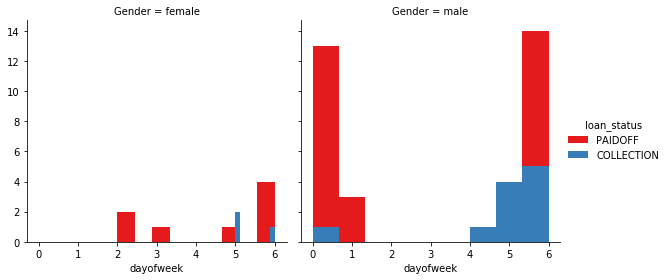

In [137]:
g = sns.FacetGrid(data=test_data,col="Gender",hue="loan_status",palette="Set1", height=4)
g = (g.map(plt.hist, "dayofweek", bins=9, stacked=True,linewidth=1.5).add_legend())

plt.show()

In [138]:
test_data["weekend"] = test_data["dayofweek"].apply(recode_day)
test_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,10/7/2016,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,9/15/2016,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,10/9/2016,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,10/9/2016,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,9/25/2016,29,Bechalor,male,6,1


In [139]:
test_data["Gender"] = test_data["Gender"].apply(recode_gender)
test_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,10/7/2016,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,9/15/2016,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,10/9/2016,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,10/9/2016,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,9/25/2016,29,Bechalor,0,6,1


In [140]:
test_data["education"] = test_data["education"].str.replace("Bechalor","Bachelor")

In [141]:
y_test = test_data["loan_status"]
X_test = test_data[['Principal','terms','age','Gender','weekend']]

In [142]:
y_test = pd.get_dummies(y_test, drop_first=True)
y_test.head()

,PAIDOFF
0,1
1,1
2,1
3,1
4,1


In [143]:
X_test.head()

,Principal,terms,age,Gender,weekend
0,1000,30,50,1,0
1,300,7,35,0,1
2,1000,30,43,1,1
3,1000,30,26,0,1
4,800,15,29,0,1


In [144]:
X_test.Principal = label_encoder.fit_transform(X_test.Principal)
X_test.Principal.unique()

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([3, 0, 2, 1], dtype=int64)

In [145]:
X_test['terms'] = label_encoder.fit_transform(X_test['terms'])
X_test['terms'].unique()

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([2, 0, 1], dtype=int64)

In [146]:
X_test.head()

,Principal,terms,age,Gender,weekend
0,3,2,50,1,0
1,0,0,35,0,1
2,3,2,43,1,1
3,3,2,26,0,1
4,2,1,29,0,1


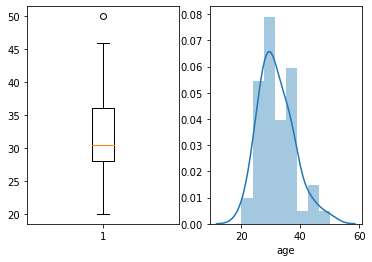

In [147]:
plt.subplot(1,2,1)
plt.boxplot(X_test["age"])
plt.subplot(1,2,2)
sns.distplot(X_test['age'])
plt.show()

**Remove Outliers**

In [148]:
outliers_t = X_test['age'][np.abs(stats.zscore(X_test['age'])) > 3] 
outliers_t

0    50
Name: age, dtype: int64

In [149]:
X_test = X_test.drop(index=outliers_t.index)
X_test.shape

(53, 5)

In [150]:
X_test.isnull().any()

Principal    False
terms        False
age          False
Gender       False
weekend      False
dtype: bool

#### Feature scaling using MinMaxScaler

In [151]:
age_reshaped_t = X_test['age'].as_matrix().reshape(-1, 1)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [152]:
X_test_minmax = min_max.fit_transform(age_reshaped_t)
df_age_t = pd.DataFrame(X_test_minmax, columns=["age_mm"])
df_age_t.head()

,age_mm
0,0.576923
1,0.884615
2,0.230769
3,0.346154
4,0.500000


In [153]:
print("Before scaling: ")
print(X_test.age.describe())
print("\n")
print("After scaling: ")
print(df_age_t.describe())

Before scaling: 
count    53.000000
mean     31.490566
std       5.489930
min      20.000000
25%      28.000000
50%      30.000000
75%      36.000000
max      46.000000
Name: age, dtype: float64


After scaling: 
          age_mm
count  53.000000
mean    0.441945
std     0.211151
min     0.000000
25%     0.307692
50%     0.384615
75%     0.615385
max     1.000000


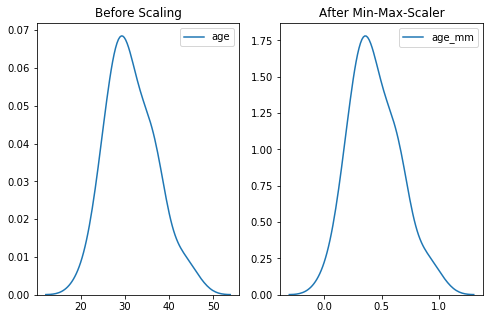

In [154]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_test["age"], ax=ax1)

ax2.set_title("After Min-Max-Scaler")
sns.kdeplot(df_age_t["age_mm"], ax=ax2)

plt.show()

In [155]:
X_test["age_mm"] = df_age_t.values

In [156]:
X_test.isnull().any()

Principal    False
terms        False
age          False
Gender       False
weekend      False
age_mm       False
dtype: bool

In [157]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 53
Data columns (total 6 columns):
Principal    53 non-null int64
terms        53 non-null int64
age          53 non-null int64
Gender       53 non-null int64
weekend      53 non-null int64
age_mm       53 non-null float64
dtypes: float64(1), int64(5)
memory usage: 2.9 KB


In [158]:
X_test = X_test.drop(columns="age")
X_test.head()

,Principal,terms,Gender,weekend,age_mm
1,0,0,0,1,0.576923
2,3,2,1,1,0.884615
3,3,2,0,1,0.230769
4,2,1,0,1,0.346154
5,1,1,0,1,0.500000


In [159]:
X_train = X
X_train.head()

,Principal,terms,Gender,weekend,age_mm
0,4,2,0,0,0.931034
1,4,2,1,0,0.517241
2,4,1,0,0,0.310345
3,4,2,1,1,0.344828
4,4,2,0,1,0.379310


In [160]:
y_test.head()

,PAIDOFF
0,1
1,1
2,1
3,1
4,1


In [161]:
y_test = y_test.drop(index=outliers_t.index)
y_test.shape

(53, 1)

In [162]:
y_train = y

### Model Evaluation

In [163]:
from sklearn.metrics import confusion_matrix, classification_report

In [164]:
lr1.score(X_train,y_train)

0.7514619883040936

In [165]:
lr1.score(X_test,y_test)

0.7358490566037735

In [166]:
y_lr_pred = lr1.predict(X_test)

In [167]:
accuracy_score(y_test,y_lr_pred)

0.7358490566037735

In [168]:
print("The train accuracy is: ", accuracy_score(y_train,yHat_train))

The train accuracy is:  0.7514619883040936


The model has the accuracy of training and testing varied by 1%, nearly 74%: this variation is not considerable.

In [169]:
conf_mat0 = confusion_matrix(y_true=y_test, y_pred=y_lr_pred)
print("Confusion matrix:\n", conf_mat0)

Confusion matrix:
 [[ 0 14]
 [ 0 39]]


In [170]:
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        39

    accuracy                           0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53



c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Accuracy Score | F1-score |
|--------------------|---------|----------|
| LogisticRegression | 0.74       | 0.85      |

<h3>Thanks for completing this project!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
<hr>
<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>